# K Nearest Neighbors: Predicting King County Housing Prices



Dataset




### How would you predict the price of a house that is about to go on sale?



Online property companies offer valuations of houses using machine learning techniques. The aim of this report is to predict the house sales in King County, Washington State, USA using Multiple Linear Regression (MLR). The dataset consisted of historic data of houses sold between May 2014 to May 2015.
We will predict the sales of houses in King County with an accuracy of at least 75-80% and understand which factors are responsible for higher property value - $650K and above.”

The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. 



The data set contains 21613 observations (home sales in 2014-15) with 19 features plus house price. Descriptions and names of the columns (features) are given below.

## Features
1.	date: Date house was sold
2.	price: Price of the sold house
3.	bedrooms: Number of Bedrooms
4.	bathrooms: Number of bathrooms
5.	sqft_living: Square footage of the living space
6.	sqrt_lot: Square footage of the lot
7.	floors: Total floors in the house
8.	waterfront: Whether the house is on a waterfront(1: yes, 0: no)
9.	view: special view?
10.	condition: Condition of the house
11.	grade: unknown
12.	sqft_above: Square footage of house apart from basement
13.	sqft_basement: Square footage of the basement
14.	yr_built: Built year
15.	yr_renovated: Year when the house was renovated
16.	zipcode: zipcode of the house
17.	lat: Latitude coordinate
18.	long Longitude coordinate
19.	sqft_living15: Living room area in 2015(implies some renovations)
20.	sqrt_lot15: Lot area in 2015(implies some renovations)

### X = house_data[features]
### y = house_data['price'].values




## Similar houses should be similar in price

* Square footage
* Number of floors
* Location


## Distance as a measure of similarity

How 'far away' are houses from each other given all of their features?



## What is K-Nearest Neighbors?

**_K-Nearest Neighbors_** (or KNN, for short) is a supervised learning algorithm that can be used for both **_Classification_** and **_Regression_** tasks. KNN is a distance-based classifier, meaning that it implicitly assumes that the smaller the distance between 2 points, the more similar they are. In KNN, each column acts as a dimension. In a dataset with two columns, we can easily visualize this by treating values for one column as X coordinates and and the other as Y coordinates. Since this is a **_Supervised Learning Algorithm_**, we must also have the labels for each point in our dataset, or else we can't use this algorithm for prediction.

## Fitting the Model

KNN is unique compared to other algorithms in that it does almost nothing during the "fit" step, and all the work during the "predict" step. During the 'fit' step, KNN just stores all the training data and corresponding values. No distances are calculated at this point. 

## Making Predictions with K

All the magic happens during the 'predict' step. During this step, KNN takes a point that we want a class prediction for, and calculates the distances between that point and every single point in the training set. It then finds the `K` closest points, or **_Neighbors_**, and examines the values of each. You can think of each of the K-closest points getting a 'vote' about the predicted value. Often times the mean of all the values is taken to make a prediction about the new point.

In the following animation, K=3.

<img src='https://github.com/Bmcgarry194/knn_workshop/blob/master/knn.gif?raw=1'>

## Distance Metrics

As we explored in a previous lesson, there are different **_distance metrics_** when using KNN. For KNN, we can use **_Manhattan_**, **_Euclidean_**, or **_Minkowski Distance_**--from an algorithmic standpoint, it doesn't matter which! However, it should be noted that from a practical standpoint, these can affect our results and our overall model performance. 


Tasks
1.	Load preprocess the dataset
2.	Creating our own implementation of KNN regressor 
3.	Housing data predictions
4.	Limit our predictions to the middle 80% of our dataset
5.	Apply data scaling
6.	Predict data using your own knn
7.	Predict data using sklearn’s knn
8.	Choosing the optimal number of neighbors: Model behavior with increasing k for regression problem
9.	Finding optimal k for King County Dataset


Download and load the data (csv file contains ';' as delimiter)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import euclidean as euc
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
#from visualize import generate_moons_df, preprocess, plot_boundaries

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
np.random.seed(0)

## Creating our own implementation of KNN regressor

In [3]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))
class KNN:

    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        
        k_idx = np.argsort(distances)[:self.k]
        
        k_neighbor_labels = [self.y_train[i] for i in k_idx]  
        
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

## Housing data predictions

In [4]:
house_data = pd.read_csv('/content/kc_house_data.csv')

## Limit our predictions to the middle 80% of our dataset

It is easier to make predictions where the data is most dense but doing this means that any predictions made outside of the range of values we are training on will be highly suspect

In [5]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
features = ['sqft_living', 'lat', 'long']

X = house_data[features].values
y = house_data['price'].values

In [7]:
X = np.array(X)
y = np.array(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

## Scaling our data

In [9]:
scaler = StandardScaler()

scaler.fit(X)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [10]:
my_knn = KNN()
my_knn.fit(X_train, y_train)

In [11]:
X_train_scaled.shape

(17290, 3)

## Training and Inferencing

In [12]:
my_knn = KNN()
my_knn.fit(X_train,y_train)

In [13]:
#This will run for a long time
clf = KNN(k=3)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

In [14]:
X_test_scaled.shape

(4323, 3)

In [15]:
predictions

array([ 288000., 2450000.,  560000., ...,  419500.,  137000.,  561000.])

In [16]:
rmse = np.sqrt(mean_squared_error(predictions,y_test))

In [17]:
print(f'Root Mean Squared Error: {rmse:.2f}')

Root Mean Squared Error: 256596.45


## Lets use Sklearn's KNN implementation

In [18]:
from sklearn.neighbors import KNeighborsRegressor

In [19]:
nn = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)

nn.fit(X_train, y_train)

sk_preds = nn.predict(X_test)

rmse = np.sqrt(mean_squared_error(sk_preds,y_test))

print(f'Root Mean Squared Error: {rmse:.2f}')

Root Mean Squared Error: 218784.83


## Finding optimal k for King County Dataset

In [20]:
ks = range(1, 30)

test_errors = np.zeros(len(list(ks)))

for i, k in enumerate(ks):
    
    nn = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)

    nn.fit(X_train,y_train)
    test_preds = nn.predict(X_test)
    
    test_errors[i] = np.sqrt(mean_squared_error(test_preds,y_test))

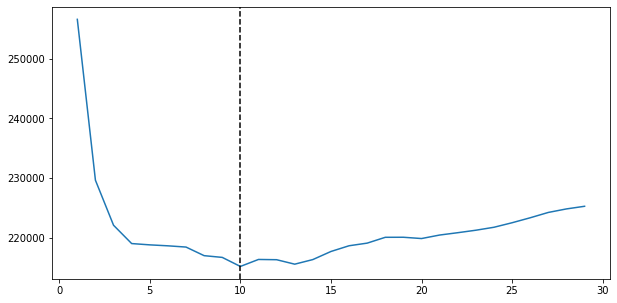

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(list(ks), test_errors)
ax.axvline(list(ks)[np.argmin(test_errors)], linestyle='--', color='black');

In [22]:
optimal_k = list(ks)[np.argmin(test_errors)]

optimal_error = np.min(test_errors)

print(f'Optimal number of Neighbors: {optimal_k} Root Mean Squared Error: {optimal_error:.2f}')

Optimal number of Neighbors: 10 Root Mean Squared Error: 215163.24
